<a href="https://colab.research.google.com/github/khaelano/Algoritma/blob/master/Assignment_BCC_DS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### **Mengambil data dari *.csv**

In [ ]:
data = pd.read_csv("https://raw.githubusercontent.com/SulthanAbiyyu/mini-bootcamp-bcc-2023/master/housing.csv")
data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND


In [ ]:
data.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


### **Membersihkan data dari null**



In [ ]:
data.isna().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

In [ ]:
mean_total_bedrooms = data['total_bedrooms'].mean()
mean_total_bedrooms

data['total_bedrooms'].fillna(value=mean_total_bedrooms, inplace=True)
data.isna().sum()

longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
median_house_value    0
ocean_proximity       0
dtype: int64

In [ ]:
# Drop kolom yang tidak berguna
data = data.drop([], axis=1)

### **Membersihkan data dari outlier**

#### Outlier kategorikal

In [ ]:
ocean_proximity_counts = data['ocean_proximity'].nunique()
ocean_proximity_values = data['ocean_proximity'].unique()

print('ocean proximity counts:', ocean_proximity_counts)
print('ocean proximity values:', ocean_proximity_values)
print(data['ocean_proximity'].value_counts())

ocean proximity counts: 5
ocean proximity values: ['NEAR BAY' '<1H OCEAN' 'INLAND' 'NEAR OCEAN' 'ISLAND']
<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64


In [ ]:
ocean_proximity_mode = data['ocean_proximity'].mode()

data['ocean_proximity'].replace('NEAR BAY', 'NEAR OCEAN', inplace=True)

data['ocean_proximity'].replace("ISLAND", ocean_proximity_mode[0], inplace=True)
data['ocean_proximity'].value_counts()

<1H OCEAN     9141
INLAND        6551
NEAR OCEAN    4948
Name: ocean_proximity, dtype: int64

#### Outlier numerikal

In [ ]:
def plot_boxplot_with_outliers(df, column_name):
    plt.boxplot(df[column_name], vert=False)
    plt.xlabel(column_name)
    plt.title('Outliers pada ' + column_name)
    plt.show()

def remove_outliers_iqr(data, column_name):

    Q1 = np.percentile(data[column_name], 25)
    Q3 = np.percentile(data[column_name], 75)

    IQR = Q3 - Q1

    maximum = Q3 + (1.5 * IQR)
    minimum = Q1 - (1.5 * IQR)

    outlier_filter = (data[column_name] < minimum) | (
        data[column_name] > maximum)

    # print(outlier_filter)

    data = data[~outlier_filter]

    return data

def remove_outliers_zscore(data, column_name, treshold):
    mean = data[column_name].mean()
    std = data[column_name].std()

    outliers = []
    for i in data[column_name]:
        z = (i-mean)/std
        if z > treshold:
            outliers.append(i)

    filter_outliers = ~data[column_name].isin(outliers)
    data = data[filter_outliers]

    return data

In [ ]:
# data = remove_outliers_iqr(data, 'median_income')
data = remove_outliers_iqr(data, 'median_house_value')
data = remove_outliers_iqr(data, 'total_rooms')
data = remove_outliers_iqr(data, 'total_bedrooms')
data = remove_outliers_iqr(data, 'housing_median_age')
# data = remove_outliers_iqr(data, 'households')

# plot_boxplot_with_outliers(data, 'median_income')
# plot_boxplot_with_outliers(data, 'median_house_value')
# plot_boxplot_with_outliers(data, 'total_rooms')
# plot_boxplot_with_outliers(data, 'total_bedrooms')
# plot_boxplot_with_outliers(data, 'housing_median_age')
# plot_boxplot_with_outliers(data, 'households')
data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR OCEAN
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR OCEAN
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR OCEAN
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR OCEAN
5,-122.25,37.85,52.0,919.0,213.0,413.0,193.0,4.0368,269700.0,NEAR OCEAN
...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND


### **Explanatory data analysis**

In [ ]:
def plt_bar_plot(x, y, title, label_x, label_y):
    plt.bar(x, y)
    plt.xlabel(label_x)
    plt.ylabel(label_y)
    plt.title(title)
    plt.show()

def plt_hist(x, y, title, label_x, label_y):
    plt.hist(y, x)
    plt.xlabel(label_x)
    plt.ylabel(label_y)
    plt.title(title)
    plt.show()

def dist_plot(df):
    plt.figure(figsize=(10, 4))
    sns.displot(df)
    plt.title("dist plot")
    sns.despine()
    plt.show()

<Figure size 1000x400 with 0 Axes>

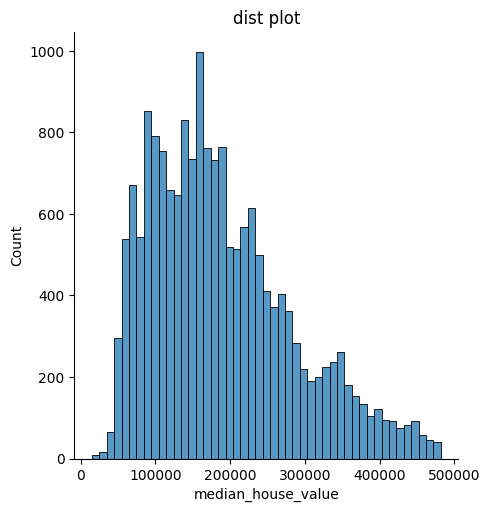

<Figure size 1000x400 with 0 Axes>

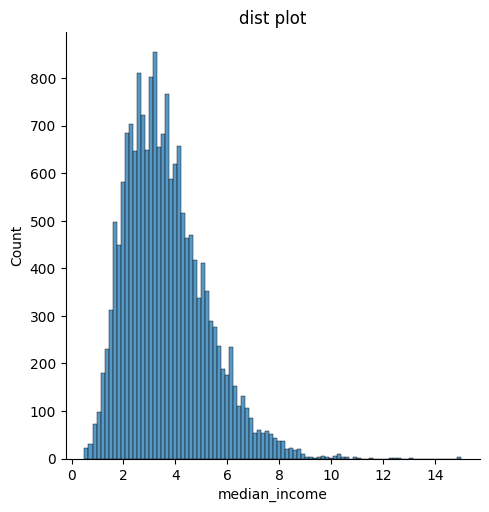

<Figure size 1000x400 with 0 Axes>

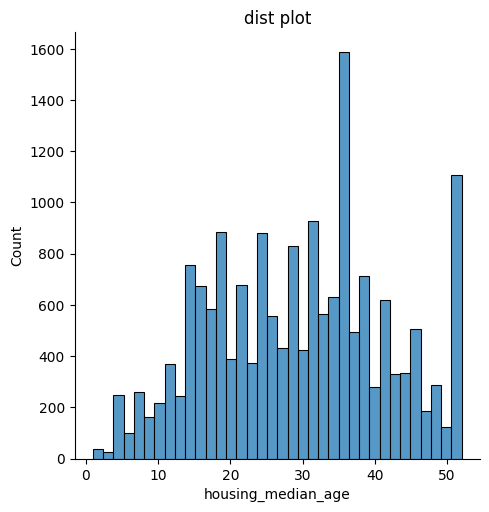

<Figure size 1000x400 with 0 Axes>

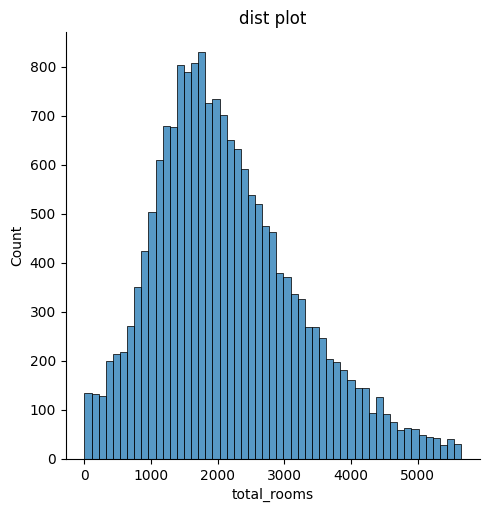

<Figure size 1000x400 with 0 Axes>

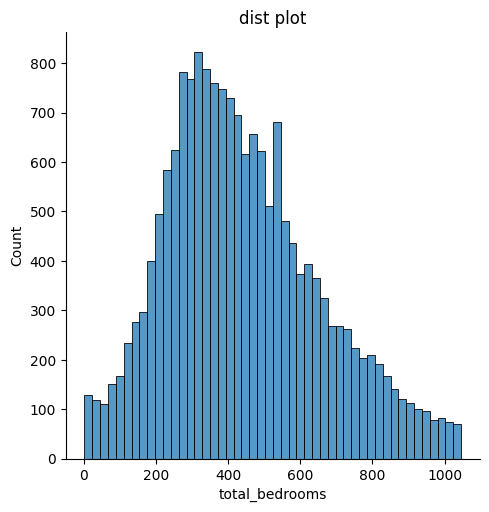

In [ ]:
#lt_bar_plot(x, y, 'Distribusi jarak rumah dari laut', 'Jarak dari laut', 'jumlah')

dist_plot(data['median_house_value'])
dist_plot(data['median_income'])
dist_plot(data['housing_median_age'])
dist_plot(data['total_rooms'])
dist_plot(data['total_bedrooms'])
# dist_plot(data['median_house_value'], "Dist plot median_house_value")
# dist_plot(data['median_house_value'], "Dist plot median_house_value")

#### Univariate

#### Distribusi jarak rumah dari laut

In [ ]:
x = data['ocean_proximity'].unique()
y = data['ocean_proximity'].value_counts()

# plt_bar_plot(x, y, 'Distribusi jarak rumah dari laut', 'Jarak dari laut', 'jumlah')

# dist_plot(data['median_house_value'], "Dist plot median_house_value")
# dist_plot(data['median_house_value'], "Dist plot median_house_value")
# dist_plot(data['median_house_value'], "Dist plot median_house_value")
# dist_plot(data['median_house_value'], "Dist plot median_house_value")
# dist_plot(data['median_house_value'], "Dist plot median_house_value")
# dist_plot(data['median_house_value'], "Dist plot median_house_value")
# dist_plot(data['median_house_value'], "Dist plot median_house_value")


## **Machine Learning**

### **Data preprocessing**

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder, StandardScaler

#### Split

In [ ]:
train, test = train_test_split(data, test_size = 0.20, random_state=3054)

print('banyak data: ', len(data))
print('banyak data test: ', len(test))
print('banyak data train: ', len(train))

banyak data:  17811
banyak data test:  3563
banyak data train:  14248


In [ ]:
label_regresi = 'median_house_value'

# Train data
train_data = train.drop(label_regresi, axis=1)
train_label_regresi = train[label_regresi]

# Test data
test_data = test.drop(label_regresi, axis=1)
test_label_regresi = test[label_regresi]

train_data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity
5507,-118.43,33.99,42.0,2558.0,558.0,1328.0,541.0,4.8750,<1H OCEAN
9786,-121.00,35.94,16.0,3077.0,628.0,1479.0,536.0,3.3724,<1H OCEAN
18223,-122.08,37.41,20.0,1896.0,456.0,1069.0,436.0,4.6875,NEAR OCEAN
14834,-117.10,32.68,20.0,1012.0,269.0,837.0,240.0,2.0488,NEAR OCEAN
9589,-120.47,37.34,9.0,2934.0,511.0,1227.0,501.0,3.6742,INLAND
...,...,...,...,...,...,...,...,...,...
790,-122.08,37.64,36.0,1340.0,245.0,789.0,248.0,3.8000,NEAR OCEAN
10701,-117.70,33.61,16.0,2371.0,725.0,1738.0,686.0,3.6484,<1H OCEAN
18498,-121.51,37.02,19.0,2372.0,394.0,1142.0,365.0,4.0238,INLAND
6883,-118.09,34.06,38.0,3230.0,840.0,3485.0,827.0,2.6290,<1H OCEAN


#### Feature transformation

In [ ]:
kolom_objek = train_data.select_dtypes(include=object).columns.tolist()
kolom_numerik = train_data.select_dtypes(include=object).columns.tolist()

In [ ]:
ohe = OneHotEncoder()

# Train data
train_ohe = ohe.fit_transform(train_data[kolom_objek]).toarray()
train_ohe = pd.DataFrame(train_ohe, columns=ohe.get_feature_names_out())
train_data = pd.concat([train_data.reset_index(drop=True), train_ohe], axis=1)
train_data = train_data.drop(kolom_objek, axis=1)
train_data.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity_<1H OCEAN,ocean_proximity_INLAND,ocean_proximity_NEAR OCEAN
0,-118.43,33.99,42.0,2558.0,558.0,1328.0,541.0,4.8750,1.0,0.0,0.0
1,-121.00,35.94,16.0,3077.0,628.0,1479.0,536.0,3.3724,1.0,0.0,0.0
2,-122.08,37.41,20.0,1896.0,456.0,1069.0,436.0,4.6875,0.0,0.0,1.0
3,-117.10,32.68,20.0,1012.0,269.0,837.0,240.0,2.0488,0.0,0.0,1.0
4,-120.47,37.34,9.0,2934.0,511.0,1227.0,501.0,3.6742,0.0,1.0,0.0


In [ ]:
# Test data
test_ohe = ohe.transform(test_data[kolom_objek]).toarray()
test_ohe = pd.DataFrame(test_ohe, columns=ohe.get_feature_names_out())
test_data = pd.concat([test_data.reset_index(drop=True), test_ohe], axis=1)
test_data = test_data.drop(kolom_objek, axis=1)
test_data.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity_<1H OCEAN,ocean_proximity_INLAND,ocean_proximity_NEAR OCEAN
0,-117.35,34.01,23.0,3707.0,769.0,1938.0,658.0,2.7250,0.0,1.0,0.0
1,-117.96,33.65,21.0,2030.0,318.0,910.0,311.0,7.8453,1.0,0.0,0.0
2,-119.71,36.79,34.0,1891.0,323.0,966.0,355.0,3.6681,0.0,1.0,0.0
3,-122.23,37.79,48.0,1696.0,396.0,1481.0,343.0,2.0375,0.0,0.0,1.0
4,-118.36,34.09,36.0,1616.0,465.0,773.0,429.0,2.6000,1.0,0.0,0.0


In [ ]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3563 entries, 0 to 3562
Data columns (total 11 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   longitude                   3563 non-null   float64
 1   latitude                    3563 non-null   float64
 2   housing_median_age          3563 non-null   float64
 3   total_rooms                 3563 non-null   float64
 4   total_bedrooms              3563 non-null   float64
 5   population                  3563 non-null   float64
 6   households                  3563 non-null   float64
 7   median_income               3563 non-null   float64
 8   ocean_proximity_<1H OCEAN   3563 non-null   float64
 9   ocean_proximity_INLAND      3563 non-null   float64
 10  ocean_proximity_NEAR OCEAN  3563 non-null   float64
dtypes: float64(11)
memory usage: 306.3 KB


#### Scaling

In [ ]:
kolom_objek = train_data.select_dtypes(include=object).columns.tolist()
kolom_numerik = train_data.select_dtypes(include=np.number).columns.tolist()

In [ ]:
# Standard Scaling
ss = StandardScaler()

train_ss = train_data.copy()
train_ss[kolom_numerik] = ss.fit_transform(train_data[kolom_numerik])
#train_ss.head()

test_ss = test_data.copy()
test_ss[kolom_numerik] = ss.transform(test_data[kolom_numerik])
train_ss.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity_<1H OCEAN,ocean_proximity_INLAND,ocean_proximity_NEAR OCEAN
count,1.424800e+04,1.424800e+04,1.424800e+04,1.424800e+04,1.424800e+04,1.424800e+04,1.424800e+04,1.424800e+04,1.424800e+04,1.424800e+04,1.424800e+04
mean,-6.976764e-16,-8.477840e-18,-2.294004e-17,3.341266e-17,-4.588008e-17,1.496089e-17,3.191657e-17,-3.311345e-16,-1.161963e-16,2.692961e-17,-3.241527e-18
std,1.000035e+00,1.000035e+00,1.000035e+00,1.000035e+00,1.000035e+00,1.000035e+00,1.000035e+00,1.000035e+00,1.000035e+00,1.000035e+00,1.000035e+00
min,-2.376101e+00,-1.457381e+00,-2.323635e+00,-1.979239e+00,-2.059480e+00,-1.849990e+00,-2.041995e+00,-2.018888e+00,-8.804717e-01,-7.031650e-01,-5.503208e-01
25%,-1.091860e+00,-8.075113e-01,-8.508350e-01,-7.048380e-01,-7.239544e-01,-6.853570e-01,-7.141830e-01,-7.277035e-01,-8.804717e-01,-7.031650e-01,-5.503208e-01
50%,5.146919e-01,-6.496859e-01,4.920933e-02,-1.464760e-01,-1.381974e-01,-1.548696e-01,-1.394586e-01,-1.481456e-01,-8.804717e-01,-7.031650e-01,-5.503208e-01
75%,7.870311e-01,9.517778e-01,7.037870e-01,5.908957e-01,6.162575e-01,5.284378e-01,6.185831e-01,5.775097e-01,1.135755e+00,1.422141e+00,-5.503208e-01
max,2.521007e+00,2.910670e+00,1.849298e+00,3.259347e+00,2.832762e+00,1.145793e+01,5.563195e+00,7.322714e+00,1.135755e+00,1.422141e+00,1.817122e+00


In [ ]:
# Min Max Scaling
mm = MinMaxScaler()

train_mm = train_data.copy()
train_mm[kolom_numerik] = mm.fit_transform(train_data[kolom_numerik])
#train_mm.head()

test_mm = test_data.copy()
test_mm[kolom_numerik] = mm.transform(test_data[kolom_numerik])
test_mm.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity_<1H OCEAN,ocean_proximity_INLAND,ocean_proximity_NEAR OCEAN
count,3563.000000,3563.000000,3563.000000,3563.000000,3563.000000,3563.000000,3563.000000,3563.000000,3563.000000,3563.000000,3563.000000
mean,0.485802,0.335460,0.561253,0.380268,0.425020,0.136903,0.269003,0.215684,0.433904,0.332585,0.233511
std,0.204331,0.233509,0.238379,0.191898,0.206839,0.072993,0.131677,0.106219,0.495682,0.471205,0.423124
min,0.005102,0.002125,0.019608,0.002833,0.000958,0.000229,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.264286,0.147715,0.352941,0.242918,0.274904,0.086254,0.174593,0.134577,0.000000,0.000000,0.000000
50%,0.589796,0.185972,0.568627,0.353399,0.396552,0.125659,0.250163,0.201459,0.000000,0.000000,0.000000
75%,0.645918,0.553666,0.725490,0.496990,0.551724,0.176804,0.351140,0.278741,1.000000,1.000000,0.000000
max,1.006122,1.000000,1.000000,0.998938,0.999042,0.764261,0.777850,1.000000,1.000000,1.000000,1.000000


### **Training**

In [ ]:
from sklearn.linear_model import *

model = LinearRegression()
model.fit(train_mm, train_label_regresi)

LinearRegression()

In [ ]:
prediksi = model.predict(test_mm)
prediksi[:5]

array([120743.5271015 , 351925.76998812, 139705.90106699, 148281.80287944,
       205026.07145275])

In [ ]:
test_label_regresi[:5]

12110     95300.0
11437    343300.0
2125      82000.0
205      122500.0
8824     313600.0
Name: median_house_value, dtype: float64

In [ ]:
from sklearn.metrics import mean_squared_error

# skor
mse = mean_squared_error(test_label_regresi, prediksi)
rmse = np.sqrt(mse)

print('MSE: ', mse)
print("RMSE: ", rmse)

MSE:  3398147103.7159576
RMSE:  58293.628328625746
